# HW3 Assignment 2

In [12]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

%pylab inline


if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")


os.getenv ('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


'/home/cusp/vsg247/PUIdata'

In [2]:
### A function to download the data in case it's not there yet. 

def getCitiBikeCSV(datestring):
    '''
    Function that looks for a csv file with citibike data corresponding to the datestring in the PUIdata directory.
    If csv file is not there, looks for the corresponding zip file. If the zip file is there unzip it.
    If the zip file is not there either, the function downloads it from the citibike website and then unzip it. 
    '''
    
    print('Looking for the citibike data for the month ' + datestring + "...")
    
    ### First check if the csv file is not already at the directory
    if os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("CSV File was already at the PUIdata directory.")
        
    # If the CSV is not there, now check if the ZIP File is already there.
    # If the ZIP File is there, unzip it and move the unzipped CSV to the PUIdata directory
    elif os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
            print('ZIP File was already at the PUIdata directory.')
            
            # unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            print('CSV File unzipped.')
            
            # Move the CSV to the PUIdata directory
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    
    else :
        # Download the Zip File; move it to the PUIdata directory; unzip it; move the csv to the PUIdata directory.
        print ("Downloading", datestring)
        
        # Downloading the ZIP File
        os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
        print ("ZIP File downloaded.")
        
        # Moving it to the PUIdata directory
        os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
        
        # unzip the csv 
        os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
        
        # and move it to the PUIdata directory
        os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
           
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("CSV File in place, you can continue.\n")

## IDEA

The average age of women who bike regularly (subscribers) is lower than the average age of men who bike regularly.

## Null Hypothesis:

##### The average age of women who bike regularly (subscribers) is the same or higher than the average age of men who bike regularly (subscribers). 

$H_0 : AGE_{W_{subs}} >= AGE_{M_{subs}}$

## Alternative Hypothesis:

##### The average age of women who bike regularly (subscribers) is the smaller than the average age of men who bike regularly (subscribers). 

$H_a : AGE_{W_{subs}} < AGE_{M_{subs}}$
  
### I will use a significance level of $\alpha=0.05$    

In [3]:
# getting data for the summer of 2015, from June until August.
summer2015 = ['201506', '201507', '201508']
for month in summer2015:
    getCitiBikeCSV(month)    

Looking for the citibike data for the month 201506...
CSV File was already at the PUIdata directory.
CSV File in place, you can continue.

Looking for the citibike data for the month 201507...
CSV File was already at the PUIdata directory.
CSV File in place, you can continue.

Looking for the citibike data for the month 201508...
CSV File was already at the PUIdata directory.
CSV File in place, you can continue.



In [4]:
# exemple of the raw data of one of the analyzed months

df_jun=pd.read_csv(os.getenv("PUIDATA") + "/" + '201506' + '-citibike-tripdata.csv')
df_jun.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [5]:
# getting and putting together the data from the whole summer

for month in summer2015:
    #read the csv corresponding to the month
    df_aux = pd.read_csv(os.getenv("PUIDATA") + "/" + month + '-citibike-tripdata.csv')
    
    # drops all columns but 'usertype', 'birth year' and 'gender'
    df_aux.drop([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid'], axis=1, inplace=True)
    
    # drops rows with missing values
    df_aux.dropna(inplace = True)
    
    # if month is the first of the period, creates the final data frame
    # if the final was already created, adds the rows from the next moth to it. 
    if month == summer2015[0]:
        df = df_aux
    else:
        df = pd.concat([df, df_aux])
        

In [6]:
# printing the reducted DF
df.head()

,usertype,birth year,gender
0,Subscriber,1984.0,1
1,Subscriber,1997.0,1
2,Subscriber,1993.0,1
3,Subscriber,1981.0,1
5,Subscriber,1976.0,1


In [7]:
# Adding column 'age' to the data frame, calculating it from the birth year.   
df['age'] = (2016 - df['birth year']).astype(int)
df.head()

,usertype,birth year,gender,age
0,Subscriber,1984.0,1,32
1,Subscriber,1997.0,1,19
2,Subscriber,1993.0,1,23
3,Subscriber,1981.0,1,35
5,Subscriber,1976.0,1,40


In [8]:
# while cleaning the data I noticed that the birth date is available only for subscribers. 
# therefore, when I dropped the rows with missing values, all the rows usertype = 'Customer' were also dropped. 
df.usertype.unique()

array(['Subscriber'], dtype=object)

In [9]:
df.describe()

,birth year,gender,age
count,2.674181e+06,2.674181e+06,2.674181e+06
mean,1.976707e+03,1.238835e+00,3.929291e+01
std,1.141686e+01,4.289685e-01,1.141686e+01
min,1.885000e+03,0.000000e+00,1.700000e+01
25%,1.969000e+03,1.000000e+00,3.000000e+01
50%,1.979000e+03,1.000000e+00,3.700000e+01
75%,1.986000e+03,1.000000e+00,4.700000e+01
max,1.999000e+03,2.000000e+00,1.310000e+02


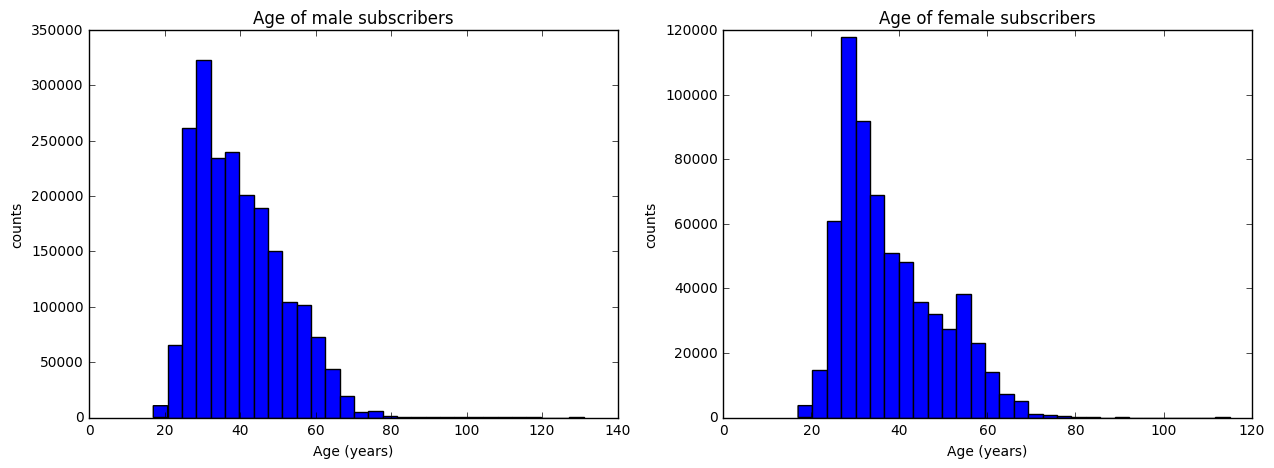

In [10]:
fig = pl.figure(figsize=(15,5))

pl.subplot(121)
pl.hist(df['age'][df['gender']==1], bins = 30)
pl.xlabel('Age (years)')
pl.ylabel('counts')
pl.title('Age of male subscribers')

pl.subplot(122)
pl.hist(df['age'][df['gender']==2], bins = 30)
pl.xlabel('Age (years)')
pl.ylabel('counts')
pl.title('Age of female subscribers')

pl.show()



#### Figure 1: Age distribution of the male and female subscribers of citibike, from the count of bike trips in the period of June to August 2015. 

In [11]:
# calculating the means and std deviation
age_m = df['age'][df['gender']==1].mean()
age_f = df['age'][df['gender']==2].mean()

std_age_m = df['age'][df['gender']==1].std()
std_age_f = df['age'][df['gender']==2].std()

print("Age_m: {0:.1f} std_m: {1:.1f}".format(age_m, std_age_m))
print("Age_f: {0:.1f} std_f: {1:.1f}".format(age_f, std_age_f))

Age_m: 39.7 std_m: 11.4
Age_f: 37.9 std_f: 11.1


#### Testing the Null Hypothesis with a z-test

In [29]:
#code adapted from : http://stats.stackexchange.com/questions/124096/two-samples-z-test-in-python
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = np.sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = (1 - stats.norm.cdf(np.abs(z))) # one-tailed test doesn't need the multiplication by 2
    return np.round(z, 3), np.round(pval, 4)

zscore, pval = twoSampZ(age_m, age_f, 0,std_age_m, std_age_f,df['age'][df['gender']==1].mean(), df['age'][df['gender']==2].mean())

print('z-score:   {0:.4f}'.format(zscore))
print('p-value:  {0:.4f}'.format(pval))

z-score:   0.6870
p-value:  0.2459


Since the p-value is higher than the significance level, the null hypothesis can not be rejected and the conclusion is that there is no statistically significant difference between the mean age of female citibike subscribers and male citibike subscribers. Therefore we can not conclude that the avearage age of female soubscribers is lower than the average age of male subscribers. 